### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 9
### Due: Saturday, Apr 13th at 11.59pm CDT
---

The first homework problem this week is very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.


1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.


2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*


3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?


4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?


5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

## Problem 2

The first few steps of this problem are the same as last week's homework.


1. Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other 10th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.


3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).


4. Scale your training and testing data to prepare it for the DNN. 


5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

# 1.1

# 1.2

* it can learn some limited non-linear behavior in the data, but it can't really
well model the data.

![alt text](<Screenshot 2024-04-11 at 22.37.37.png>)

# 1.3

* this models the data the best of the configuations tested so far. with 3 neurons the network is able to create a quadrilateral or polygon around 
class 1 surrounded by class 2. The shape of the region around Blue class depends on the run.

![alt text](<Screenshot 2024-04-11 at 22.40.31.png>)

# 1.4

![alt text](<Screenshot 2024-04-11 at 22.53.27.png>)

# 1.5

* It seems like sometimes networks that are too large fail to pick up on the data
behavior. Not sure why this is but sometimes altering the activation function can
fix it. Sigmoid and Linear cannot do the network with the prescribed architecture.
tanh and reLU can though! For the activation functions it works with, it seems to
model the data more quickly, but the model itself is much more complicated. I wonder
how they would compare via BIC

![alt text](<Screenshot 2024-04-11 at 23.08.45.png>)

![alt text](<Screenshot 2024-04-11 at 23.09.03.png>)

# 2

In [19]:
import numpy as np 
import scipy
from scipy.stats import uniform, norm, rv_histogram
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from scipy import optimize
import chainconsumer
import corner
import dynesty
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from astroML.density_estimation import KNeighborsDensity
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn import preprocessing
from astroML.linear_model import (LinearRegression, PolynomialRegression,
                                  BasisFunctionRegression, NadarayaWatson)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
from astroML.linear_model import PolynomialRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,
                                           QuadraticDiscriminantAnalysis)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from astroML.classification import GMMBayes
from sklearn.neural_network import MLPClassifier




%matplotlib inline

# 2.1

In [3]:
data = np.load('../../../homeworks/hw_data/hw8_data_1.npy')
print(data.shape[0])
data = data[::10]
print(data.shape[0])
colnames = ['u', 'g', 'r', 'i', 'z', 'specClass', 'redshift', 'redshift_err']
# LSS making arrays
uming = data['u'] - data['g']
gminr = data['g'] - data['r']
rmini = data['r'] - data['i']
iminz = data['i'] - data['z']

zarr = data['redshift']
sclass = data['specClass']

50000
5000


# 2.2

In [4]:
sclass

array(['QSO', 'GALAXY', 'QSO', ..., 'GALAXY', 'GALAXY', 'GALAXY'],
      dtype='<U6')

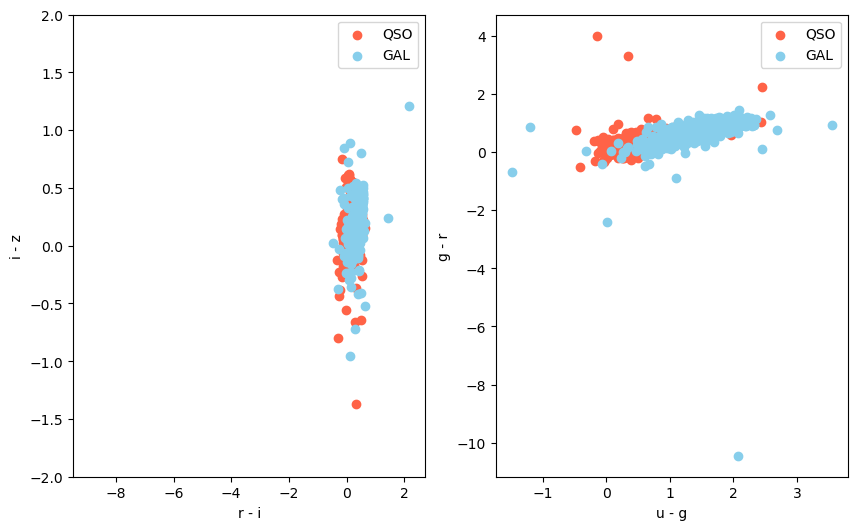

In [9]:
qsomask = np.where(sclass=='QSO')[0]
galmask = np.where(sclass=='GALAXY')[0]

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 6))
axes[0].scatter(rmini[qsomask], iminz[qsomask], c='tomato', label='QSO')
axes[0].scatter(rmini[galmask], iminz[galmask], c='skyblue', label='GAL')
axes[0].set_ylim(-2, 2)
axes[0].legend()
axes[0].set_xlabel('r - i')
axes[0].set_ylabel('i - z')

axes[1].scatter(uming[qsomask], gminr[qsomask], c='tomato', label='QSO')
axes[1].scatter(uming[galmask], gminr[galmask], c='skyblue', label='GAL')
axes[1].legend()
axes[1].set_xlabel('u - g')
axes[1].set_ylabel('g - r')
plt.show()


# 2.3

In [17]:
X = np.vstack([rmini, iminz]).T
y = np.zeros((X.shape[0]), dtype=int)
y[qsomask] = 1

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.8, random_state=42)

# 2.4

In [21]:
Xtrain_scaled = preprocessing.scale(X_train)
Xtest_scaled = preprocessing.scale(X_test)

# 2.5

In [29]:
clf = MLPClassifier(solver='sgd', alpha=1e-5, 
                   hidden_layer_sizes=(5,2), 
                   random_state=42, max_iter=1000)
clf.fit(Xtrain_scaled, y_train)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=42, solver='sgd')

score: 0.910434128519235


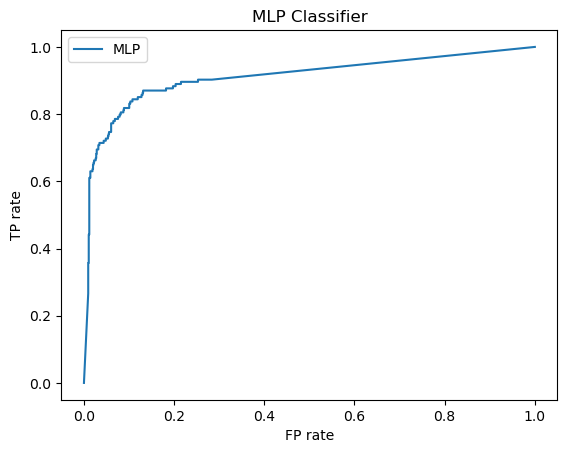

In [39]:
introc = []

y_prob = clf.predict_proba(Xtest_scaled)[:, 1]
fpr, tpr, thresh = roc_curve(y_test, y_prob)

# add (0, 0) as first point
fpr = np.concatenate([[0], fpr])
tpr = np.concatenate([[0], tpr])

plt.plot(fpr, tpr, label=f'MLP')

# LSS integrating
baseMLPscore = np.trapz(tpr, fpr)
print(f'score: {baseMLPscore}')
plt.title('MLP Classifier')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.legend()
plt.show()


# 2.6

In [27]:
# LSS from lecture 14
grid = GridSearchCV(MLPClassifier(), {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

bestso = grid.best_params_['solver']
print("best alpha choice:", bestso)
besthls = grid.best_params_['hidden_layer_sizes']
print("best solver choice:", besthls)
bestact = grid.best_params_['activation']
print("best solver choice:", bestact)
bestscore = grid.best_score_
print("best score:", bestscore)


/Users/levischult/miniconda3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/levischult/miniconda3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/levischult/miniconda3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

best alpha choice: lbfgs
best solver choice: (5, 5, 5)
best solver choice: tanh
best score: 0.93775


/Users/levischult/miniconda3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# 2.7

In [35]:
clf2 = MLPClassifier(solver=bestso, alpha=1e-5, 
                   hidden_layer_sizes=besthls,
                   activation=bestact,
                   random_state=42, max_iter=1000)
clf2.fit(Xtrain_scaled, y_train)

/Users/levischult/miniconda3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(5, 5, 5),
              max_iter=1000, random_state=42, solver='lbfgs')

In [37]:
introc

[0.910434128519235, 0.910434128519235, 0.9278806300082896]

base score: 0.910434128519235
opti score: 0.9278806300082896


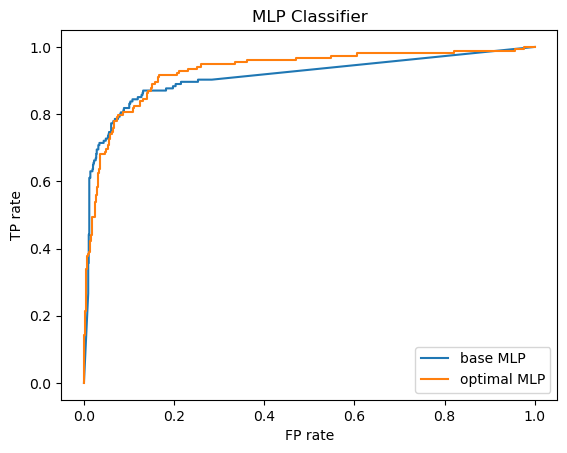

In [40]:
y_prob2 = clf2.predict_proba(Xtest_scaled)[:, 1]
fpr2, tpr2, thresh2 = roc_curve(y_test, y_prob2)

# add (0, 0) as first point
fpr2 = np.concatenate([[0], fpr2])
tpr2 = np.concatenate([[0], tpr2])

plt.plot(fpr, tpr, label=f'base MLP')
plt.plot(fpr2, tpr2, label=f'optimal MLP')


# LSS integrating
optiMLPscore = np.trapz(tpr2, fpr2)

print(f'base score: {baseMLPscore}\nopti score: {optiMLPscore}')
plt.title('MLP Classifier')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.legend()
plt.show()
